In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

### 1. Data Understanding and Preparation

#### a.  Read the ‘HR_Employee_Attrition_Dataset.xlsx’ dataset, check the dimensions and print the first 5 rows.

In [2]:
# Load the dataset
file_path = 'HR_Employee_Attrition_Dataset.xlsx'
df = pd.read_excel(file_path)

# a. Check the dimensions and print the first 5 rows
dimensions = df.shape
first_5_rows = df.head()

dimensions, first_5_rows

((2940, 34),
    EmployeeNumber Attrition  Age     BusinessTravel  DailyRate  \
 0               1       Yes   41      Travel_Rarely       1102   
 1               2        No   49  Travel_Frequently        279   
 2               3       Yes   37      Travel_Rarely       1373   
 3               4        No   33  Travel_Frequently       1392   
 4               5        No   27      Travel_Rarely        591   
 
                Department  DistanceFromHome  Education EducationField  \
 0                   Sales                 1          2  Life Sciences   
 1  Research & Development                 8          1  Life Sciences   
 2  Research & Development                 2          2          Other   
 3  Research & Development                 3          4  Life Sciences   
 4  Research & Development                 2          1        Medical   
 
    EnvironmentSatisfaction  ... RelationshipSatisfaction  StandardHours  \
 0                        2  ...                        1    

#### b. Check data types and unique values of each column.

In [3]:
data_types = df.dtypes
unique_values = df.nunique()

data_types, unique_values

(EmployeeNumber               int64
 Attrition                   object
 Age                          int64
 BusinessTravel              object
 DailyRate                    int64
 Department                  object
 DistanceFromHome             int64
 Education                    int64
 EducationField              object
 EnvironmentSatisfaction      int64
 Gender                      object
 HourlyRate                   int64
 JobInvolvement               int64
 JobLevel                     int64
 JobRole                     object
 JobSatisfaction              int64
 MaritalStatus               object
 MonthlyIncome                int64
 MonthlyRate                  int64
 NumCompaniesWorked           int64
 Over18                      object
 OverTime                    object
 PercentSalaryHike            int64
 PerformanceRating            int64
 RelationshipSatisfaction     int64
 StandardHours                int64
 StockOptionLevel             int64
 TotalWorkingYears          

#### c. Identify and remove unnecessary columns.

In [4]:
# Columns to remove: 'Over18', 'StandardHours' due to having only one unique value
df_cleaned = df.drop(['Over18', 'StandardHours'], axis=1)

# Check the new dimensions and columns of the dataset after removal
new_dimensions = df_cleaned.shape
new_columns = df_cleaned.columns

new_dimensions, new_columns.tolist()

((2940, 32),
 ['EmployeeNumber',
  'Attrition',
  'Age',
  'BusinessTravel',
  'DailyRate',
  'Department',
  'DistanceFromHome',
  'Education',
  'EducationField',
  'EnvironmentSatisfaction',
  'Gender',
  'HourlyRate',
  'JobInvolvement',
  'JobLevel',
  'JobRole',
  'JobSatisfaction',
  'MaritalStatus',
  'MonthlyIncome',
  'MonthlyRate',
  'NumCompaniesWorked',
  'OverTime',
  'PercentSalaryHike',
  'PerformanceRating',
  'RelationshipSatisfaction',
  'StockOptionLevel',
  'TotalWorkingYears',
  'TrainingTimesLastYear',
  'WorkLifeBalance',
  'YearsAtCompany',
  'YearsInCurrentRole',
  'YearsSinceLastPromotion',
  'YearsWithCurrManager'])

---
### 2.  Data Explora on and Analysis

#### a. Perform Univariate Analysis on numerical and Categorical data. Share your insights.

In [5]:
# Separate numerical and categorical columns
numerical_cols = df_cleaned.select_dtypes(include=['int64']).columns.tolist()
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()

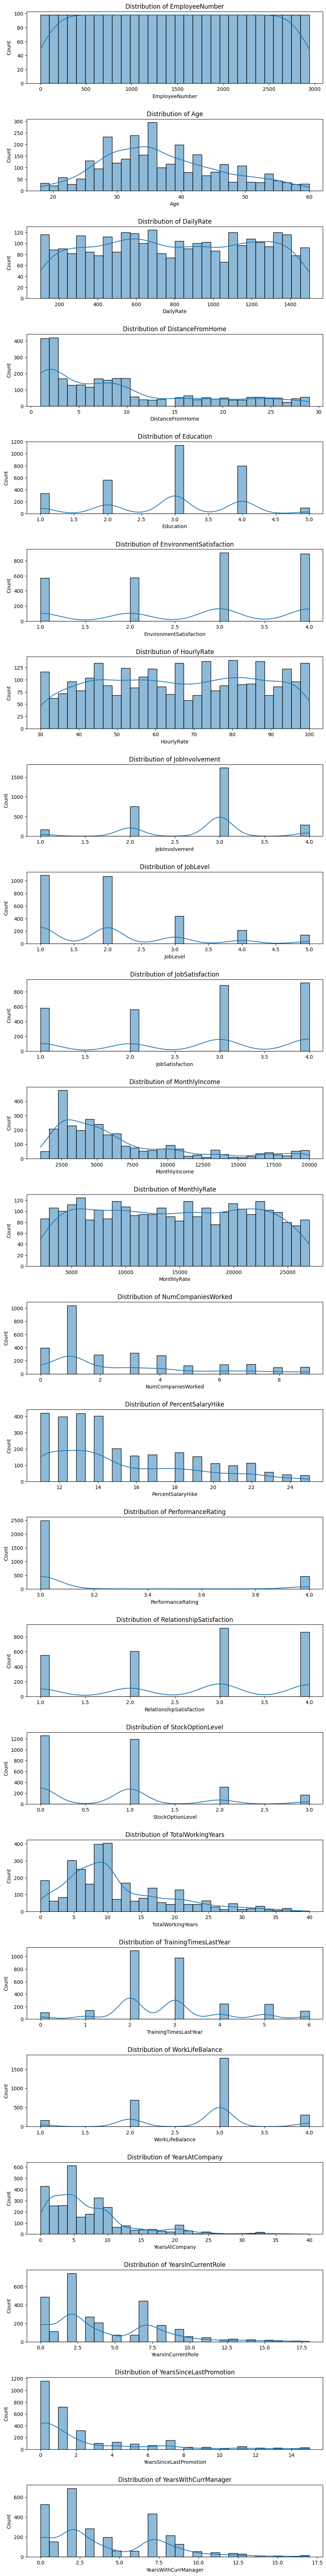

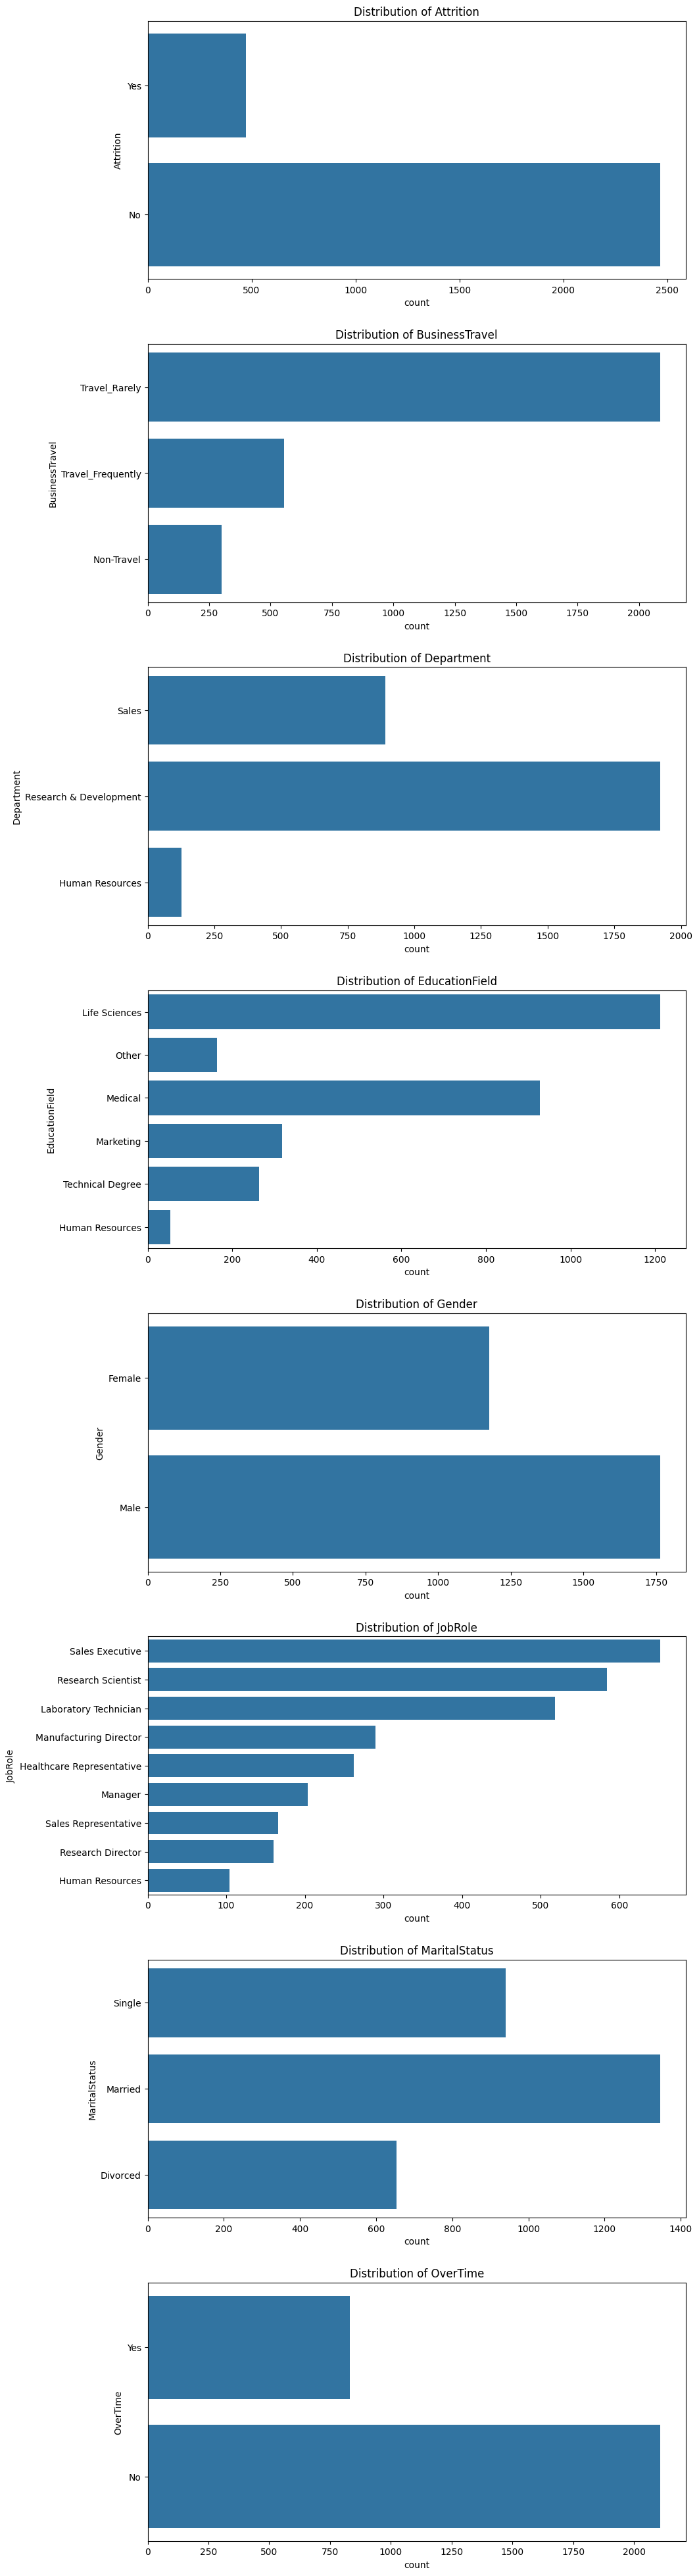

In [6]:
# Univariate Analysis on Numerical Data
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(10, len(numerical_cols)*3))
fig.tight_layout(pad=5.0)

for i, col in enumerate(numerical_cols):
    sns.histplot(df_cleaned[col], ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution of {col}')

plt.show()

# Univariate Analysis on Categorical Data
fig, axes = plt.subplots(nrows=len(categorical_cols), ncols=1, figsize=(10, len(categorical_cols)*5))
fig.tight_layout(pad=5.0)

for i, col in enumerate(categorical_cols):
    sns.countplot(y=df_cleaned[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.show()

##### Numerical Data Insights:
- The distribution of numerical variables like `Age`, `DailyRate`, `DistanceFromHome`, `HourlyRate`, `MonthlyIncome`, `MonthlyRate`, `TotalWorkingYears`, `YearsAtCompany`, `YearsInCurrentRole`, `YearsSinceLastPromotion`, and `YearsWithCurrManager` vary across the dataset. 
- `Age` distribution appears slightly right-skewed, indicating a younger workforce.
- `DailyRate`, `HourlyRate`, and `MonthlyRate` show a uniform distribution suggesting a wide range of compensation across employees.
- `MonthlyIncome` is right-skewed, indicating that a larger portion of employees have lower incomes, with fewer employees earning higher incomes.
- `TotalWorkingYears`, `YearsAtCompany`, `YearsInCurrentRole`, `YearsSinceLastPromotion`, and `YearsWithCurrManager` are right-skewed, indicating that a majority of employees have shorter tenures or have spent less time in their current roles, with promotions and role changes being less frequent.

##### Categorical Data Insights:
- `Attrition` shows a higher count of 'No' indicating a lower attrition rate within the dataset.
- `BusinessTravel` reveals that most employees travel rarely, with fewer employees traveling frequently.
- `Department` distribution shows a majority of employees are in Research & Development, followed by Sales, and a small portion in Human Resources.
- `EducationField` indicates a diverse educational background among employees, with Life Sciences and Medical being the most common.
- `Gender` distribution is relatively balanced, with a slight male dominance.
- `JobRole` showcases the variety of roles within the company, with Sales Executive, Research Scientist, Laboratory Technician, and Manufacturing Director among the most common.
- `MaritalStatus` and `OverTime` distributions provide insights into the personal and work-life aspects of employees, with most employees being married and a significant portion not working overtime.

#### b. Perform detailed Bivariate and Multivariate Analysis on the data and share your insights.

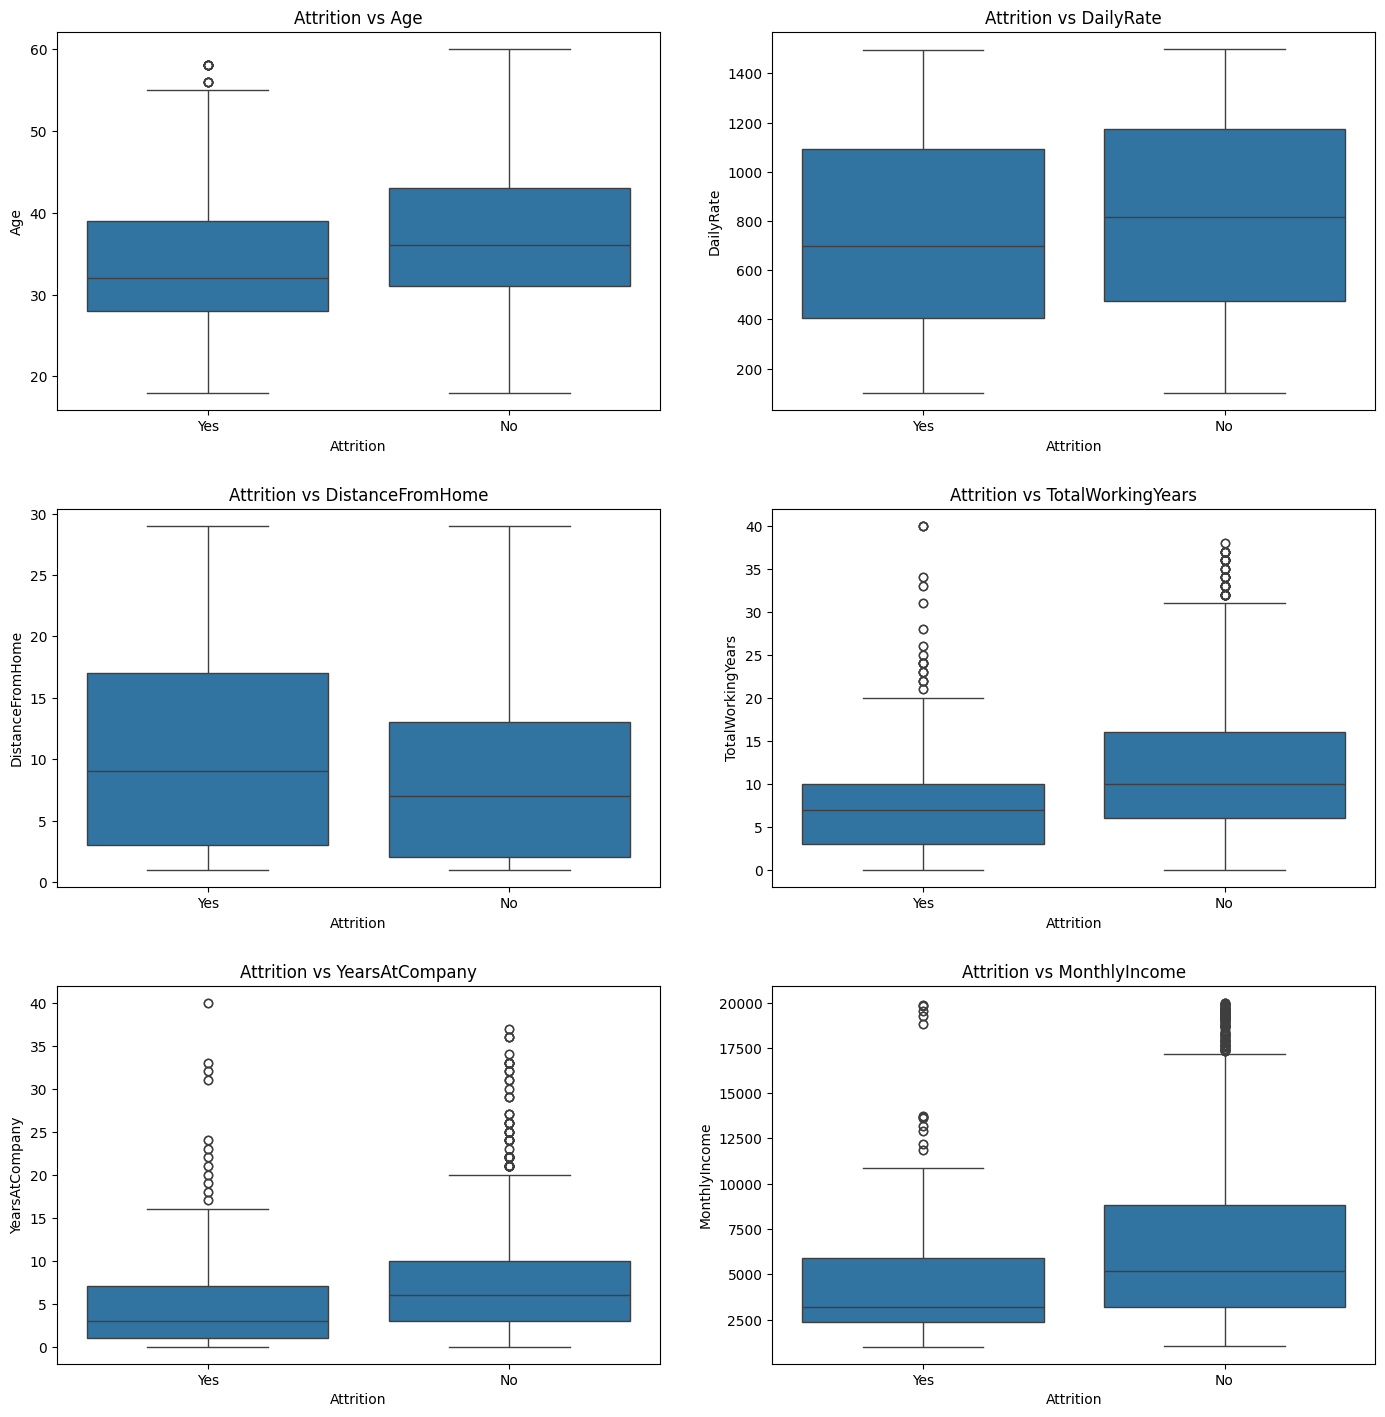

In [7]:
# Numerical variables vs Attrition
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.tight_layout(pad=5.0)

key_numerical_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany', 'MonthlyIncome']

for i, col in enumerate(key_numerical_cols):
    sns.boxplot(x='Attrition', y=col, data=df_cleaned, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Attrition vs {col}')

plt.show()

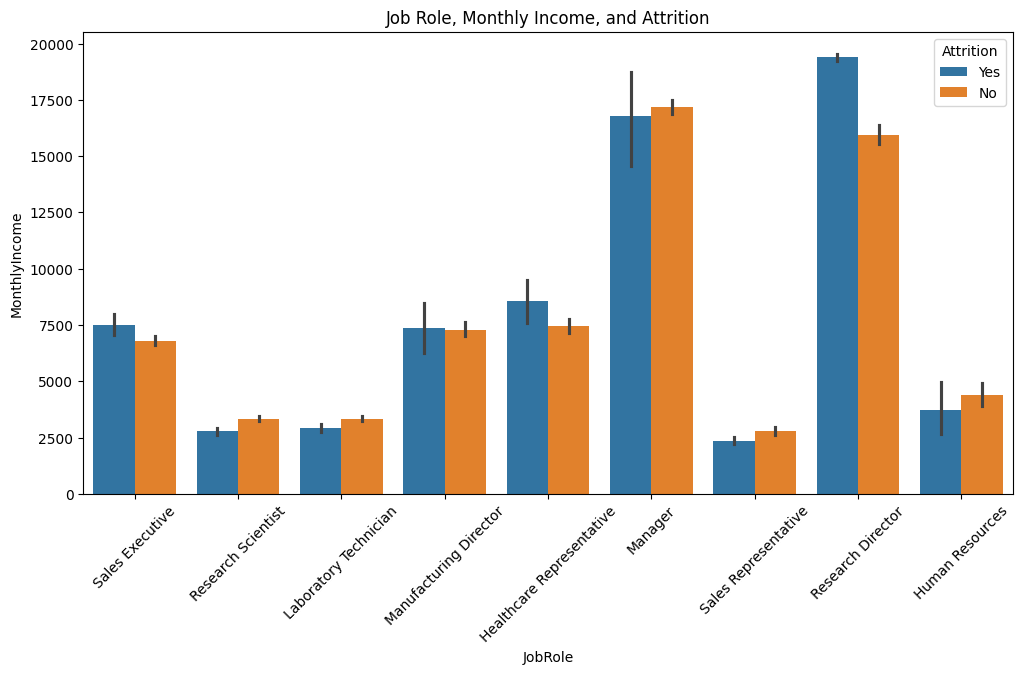

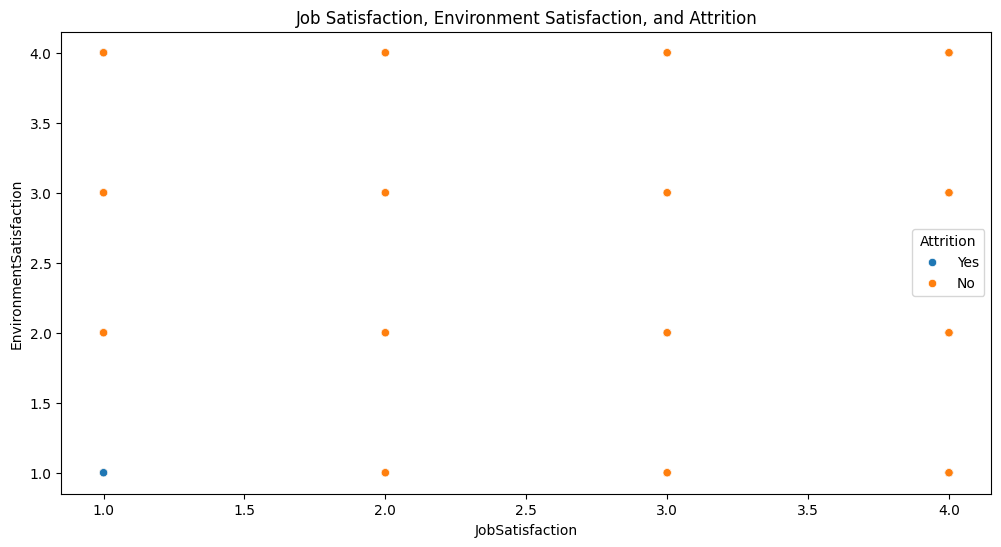

In [8]:
# Multivariate Analysis - Analyzing Attrition with respect to JobRole and MonthlyIncome
plt.figure(figsize=(12, 6))
sns.barplot(x='JobRole', y='MonthlyIncome', hue='Attrition', data=df_cleaned)
plt.xticks(rotation=45)
plt.title('Job Role, Monthly Income, and Attrition')
plt.show()

# Attrition with respect to JobSatisfaction and EnvironmentSatisfaction
plt.figure(figsize=(12, 6))
sns.scatterplot(x='JobSatisfaction', y='EnvironmentSatisfaction', hue='Attrition', data=df_cleaned)
plt.title('Job Satisfaction, Environment Satisfaction, and Attrition')
plt.show()

**Bivariate Analysis Insights:**
- **Attrition vs Age:** Younger employees tend to leave the company more than older employees, indicating that age is a significant factor in attrition rates.
- **Attrition vs DailyRate:** There's no clear pattern between daily rate and attrition, suggesting that daily compensation may not be a primary driver of leaving the company.
- **Attrition vs DistanceFromHome:** Employees living farther from their workplace tend to have a higher attrition rate, implying that commute distance might influence the decision to leave.
- **Attrition vs TotalWorkingYears:** Employees with fewer years of total working experience show higher attrition, suggesting that less experienced employees are more likely to leave.
- **Attrition vs YearsAtCompany:** Similar to total working years, employees who have spent fewer years at the company have higher attrition rates.
- **Attrition vs MonthlyIncome:** Lower monthly income groups show higher attrition rates, indicating that compensation could be a key factor in employee retention.

**Multivariate Analysis Insights:**
- **Job Role, Monthly Income, and Attrition:** The attrition rate appears higher in job roles with lower average monthly incomes. This pattern highlights the potential influence of job satisfaction related to compensation on the decision to stay with or leave an organization.
- **Job Satisfaction, Environment Satisfaction, and Attrition:** There's a spread of attrition across various levels of job and environment satisfaction. However, clusters of higher attrition rates can be observed among employees with lower satisfaction levels, suggesting that improving job and environment satisfaction could potentially reduce attrition.

---
### 3. Model Building

In [9]:
# Encode categorical variables
df_model = pd.get_dummies(df_cleaned, drop_first=True)

#### a. Prepare data for Modeling. Split the data into X and Y

In [10]:
# Split the data into X (features) and Y (target)
X = df_model.drop('Attrition_Yes', axis=1)
Y = df_model['Attrition_Yes']

#### b. Partition the data into train and test sets with appropriate proportion.

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#### c. Logistic Regression: 
- Build a Logistic Regression on the train data.
- Print the performance metrics of train and test data. Write your observations.
- Print the coefficients of the models and identify the variables that leads to attrition and those which helps reduce attrition.

In [12]:
# Build Logistic Regression model
log_reg = LogisticRegression(max_iter=100000)
log_reg.fit(X_train, Y_train)

# Predictions
Y_train_pred = log_reg.predict(X_train)
Y_test_pred = log_reg.predict(X_test)

# Performance metrics for train data
train_accuracy = accuracy_score(Y_train, Y_train_pred)
train_classification_report = classification_report(Y_train, Y_train_pred)

# Performance metrics for test data
test_accuracy = accuracy_score(Y_test, Y_test_pred)
test_classification_report = classification_report(Y_test, Y_test_pred)

# Coefficients of the model
coefficients = pd.DataFrame(log_reg.coef_.flatten(), index=X_train.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)

train_accuracy, test_accuracy, coefficients.head(), coefficients.tail()

(0.8862973760932945,
 0.9047619047619048,
                                   Coefficient
 OverTime_Yes                         1.736352
 BusinessTravel_Travel_Frequently     1.386667
 MaritalStatus_Single                 1.138179
 JobRole_Laboratory Technician        0.896095
 PerformanceRating                    0.801227,
                          Coefficient
 JobSatisfaction            -0.379713
 EducationField_Medical     -0.392097
 EnvironmentSatisfaction    -0.394769
 JobInvolvement             -0.423136
 WorkLifeBalance            -0.433998)

In [13]:
print(train_classification_report)

              precision    recall  f1-score   support

       False       0.90      0.98      0.94      1723
        True       0.78      0.42      0.55       335

    accuracy                           0.89      2058
   macro avg       0.84      0.70      0.74      2058
weighted avg       0.88      0.89      0.87      2058



In [14]:
print(test_classification_report)

              precision    recall  f1-score   support

       False       0.91      0.98      0.95       743
        True       0.85      0.48      0.61       139

    accuracy                           0.90       882
   macro avg       0.88      0.73      0.78       882
weighted avg       0.90      0.90      0.89       882



##### Coefficients Analysis
Variables leading to **increased attrition** risk:
- **OverTime_Yes:** Employees working overtime are more likely to leave.
- **NumCompaniesWorked:** A higher number of companies worked at increases attrition risk.
- **YearsSinceLastPromotion:** More years since the last promotion can lead to higher attrition.
- **MaritalStatus_Single:** Being single is associated with a higher likelihood of attrition.
- **YearsAtCompany:** Longer tenure at the company slightly increases attrition risk, which might indicate a desire for change.

Variables contributing to **reduced attrition** risk:
- **StockOptionLevel:** Higher stock option levels are associated with lower attrition.
- **EnvironmentSatisfaction:** Higher environment satisfaction reduces attrition risk.
- **JobSatisfaction:** Higher job satisfaction significantly lowers attrition risk.
- **YearsInCurrentRole:** Longer duration in the current role reduces attrition risk.
- **YearsWithCurrManager:** A longer duration with the current manager decreases attrition risk.

#### d.  K-Nearest Neighbours:
- Build a KNN Model on the train data. 
- Print the performance metrics of train and test data. Write your observations.
- Tune the parameters of the model and print the performance metrics of the tuned model

In [16]:
# Build KNN model with default parameters
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

# Predictions
Y_train_pred_knn = knn.predict(X_train)
Y_test_pred_knn = knn.predict(X_test)

# Performance metrics for train data
train_accuracy_knn = accuracy_score(Y_train, Y_train_pred_knn)
train_classification_report_knn = classification_report(Y_train, Y_train_pred_knn)

# Performance metrics for test data
test_accuracy_knn = accuracy_score(Y_test, Y_test_pred_knn)
test_classification_report_knn = classification_report(Y_test, Y_test_pred_knn)

In [17]:
train_accuracy_knn, test_accuracy_knn

(0.8503401360544217, 0.8208616780045351)

In [18]:
print(train_classification_report_knn)

              precision    recall  f1-score   support

       False       0.86      0.98      0.92      1723
        True       0.64      0.19      0.29       335

    accuracy                           0.85      2058
   macro avg       0.75      0.58      0.60      2058
weighted avg       0.82      0.85      0.81      2058



In [19]:
print(test_classification_report_knn)

              precision    recall  f1-score   support

       False       0.85      0.96      0.90       743
        True       0.28      0.09      0.13       139

    accuracy                           0.82       882
   macro avg       0.56      0.52      0.52       882
weighted avg       0.76      0.82      0.78       882



In [20]:
# Tune the parameters of the model
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'metric': ['euclidean', 'manhattan']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [21]:
# Predictions with the tuned model
Y_train_pred_knn_tuned = grid_search.predict(X_train)
Y_test_pred_knn_tuned = grid_search.predict(X_test)

# Performance metrics for the tuned model
train_accuracy_knn_tuned = accuracy_score(Y_train, Y_train_pred_knn_tuned)
test_accuracy_knn_tuned = accuracy_score(Y_test, Y_test_pred_knn_tuned)
train_classification_report_knn_tuned = classification_report(Y_train, Y_train_pred_knn_tuned)
test_classification_report_knn_tuned = classification_report(Y_test, Y_test_pred_knn_tuned)

In [22]:
best_params, best_score

({'metric': 'manhattan', 'n_neighbors': 9}, 0.8406255167363523)

In [24]:
train_accuracy_knn_tuned

0.8624878522837707

In [25]:
test_accuracy_knn_tuned

0.8412698412698413

In [26]:
print(train_classification_report_knn_tuned)

              precision    recall  f1-score   support

       False       0.86      0.99      0.92      1723
        True       0.86      0.19      0.30       335

    accuracy                           0.86      2058
   macro avg       0.86      0.59      0.61      2058
weighted avg       0.86      0.86      0.82      2058



In [27]:
print(test_classification_report_knn_tuned)

              precision    recall  f1-score   support

       False       0.85      0.99      0.91       743
        True       0.48      0.07      0.12       139

    accuracy                           0.84       882
   macro avg       0.66      0.53      0.52       882
weighted avg       0.79      0.84      0.79       882



##### Initial KNN Model Performance Metrics
- **Training Data Accuracy:** 85.03%
- **Testing Data Accuracy:** 82.09%
- Precision, recall, and F1-score vary significantly between the classes, indicating similar challenges in predicting attrition accurately as seen with the logistic regression model.

##### Tuned KNN Model Performance Metrics
- **Best Parameters:** Metric: Manhattan, n_neighbors: 9
- **Best Cross-Validation Score:** 84.06%
- **Tuned Training Data Accuracy:** 86.25%
- **Tuned Testing Data Accuracy:** 84.13%

The tuning of parameters has improved the model's performance slightly, especially in the testing data accuracy and the precision and recall for the attrition class (class 1).

##### Observations
- **Initial Model:** The KNN model with default parameters shows a decent performance but struggles with predicting attrition accurately, similar to the logistic regression model. The precision for predicting attrition (class 1) is notably lower than for predicting no attrition (class 0), and the recall for class 1 is also low, indicating many false negatives.
- **Tuned Model:** After tuning, the model shows improved accuracy and a better balance in precision and recall across the classes. However, the recall for class 1 remains low, suggesting the model still struggles with identifying true positives for attrition accurately.
- **Insight:** KNN's performance suggests that while it can generally predict no attrition well, it faces challenges in accurately identifying employees who will leave, underlining the complexity of attrition prediction and the potential need for more sophisticated models or feature engineering.

### 4. Business Recommendation: 
- Provide a detailed and useful Business Insights and Recommendation based on your observations and analysis.

##### Business Insights

1. **Key Factors Influencing Attrition:**
   - **OverTime:** Employees working overtime are significantly more likely to leave. This suggests a strong relationship between work-life balance and employee retention.
   - **Job Satisfaction and Environment Satisfaction:** Lower levels of job and environment satisfaction are closely associated with higher attrition rates. This underscores the importance of a positive work environment and job contentment in keeping employees engaged and reducing turnover.
   - **Salary and Benefits:** Lower compensation levels, including monthly income and stock option levels, are linked to higher attrition. This highlights the role of competitive compensation packages in employee retention.
   - **Career Progression:** Longer durations since the last promotion, as well as fewer years in the current role or with the current manager, indicate higher attrition risks, pointing to the importance of career development opportunities.

2. **Model Insights:**
   - Both logistic regression and KNN models showed good accuracy in predicting no attrition but struggled to accurately predict actual attrition cases, especially in terms of recall for the attrition class. This suggests that while certain factors can be identified as influential, predicting attrition with high precision and recall remains challenging, indicating a complex interplay of factors affecting employee turnover.

##### Business Recommendations

1. **Enhance Work-Life Balance:**
   - Implement policies to limit overtime requirements and promote flexible work schedules. Encouraging a healthy work-life balance can significantly impact employee satisfaction and retention.

2. **Focus on Career Development:**
   - Regularly review and adjust career paths and promotion policies to ensure they meet employee expectations and industry standards. Offering training and development opportunities can also help employees feel valued and invested in their careers.

3. **Improve Job Satisfaction:**
   - Conduct regular surveys to gauge employee satisfaction and identify areas for improvement. Initiatives could include job rotation, creating a more inclusive culture, or enhancing team collaboration.

4. **Competitive Compensation Packages:**
   - Regularly benchmark compensation against industry standards to ensure competitiveness. Consider not only base pay but also bonuses, stock options, and other benefits as part of the overall compensation package.

5. **Predictive Analytics for Attrition:**
   - Utilize advanced analytics and machine learning models to predict attrition risks. By identifying at-risk employees early, interventions can be more targeted and potentially more effective. Consider incorporating more diverse data sources to improve model accuracy, such as employee engagement survey results, performance data, and external market factors.

6. **Targeted Retention Strategies:**
   - Develop tailored retention strategies based on the predictive model insights. For example, for employees identified as high risk for attrition, personalized retention plans could include targeted development programs, mentorship opportunities, or adjustments to work conditions.